In [1]:
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pickle

%matplotlib inline

#https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

In [3]:
dataset_dir = "../data_2019.csv"
crime_df = pd.read_csv(dataset_dir)
crime_df.head()

ID                    Date        Primary Type   Latitude  Longitude  \
0  11864018  09/24/2019 08:00:00 AM  DECEPTIVE PRACTICE  41.852248 -87.623786   
1  11859805  10/13/2019 08:30:00 PM               THEFT  41.895732 -87.687784   
2  11863808  10/05/2019 06:30:00 PM               THEFT  41.882002 -87.662287   
3  11859727  10/13/2019 07:00:00 PM     CRIMINAL DAMAGE  41.946987 -87.669164   
4  11859656  10/13/2019 02:10:00 PM             ASSAULT  41.975838 -87.659854   

   Community Area  
0            33.0  
1            24.0  
2            28.0  
3             6.0  
4             3.0

In [4]:
selected_cats = ['THEFT', 'CRIMINAL DAMAGE', 'BATTERY', 'NARCOTICS']
crime_df = crime_df[crime_df['Primary Type'].isin(selected_cats)]
crime_df.head()

ID                    Date     Primary Type   Latitude  Longitude  \
1  11859805  10/13/2019 08:30:00 PM            THEFT  41.895732 -87.687784   
2  11863808  10/05/2019 06:30:00 PM            THEFT  41.882002 -87.662287   
3  11859727  10/13/2019 07:00:00 PM  CRIMINAL DAMAGE  41.946987 -87.669164   
5  11859827  10/13/2019 07:50:00 PM            THEFT  41.877822 -87.655181   
6  11859127  10/13/2019 12:05:00 AM          BATTERY  41.777822 -87.614353   

   Community Area  
1            24.0  
2            28.0  
3             6.0  
5            28.0  
6            42.0

In [5]:
len(crime_df)

153747

<AxesSubplot:title={'center':'Number of crimes per day'}>

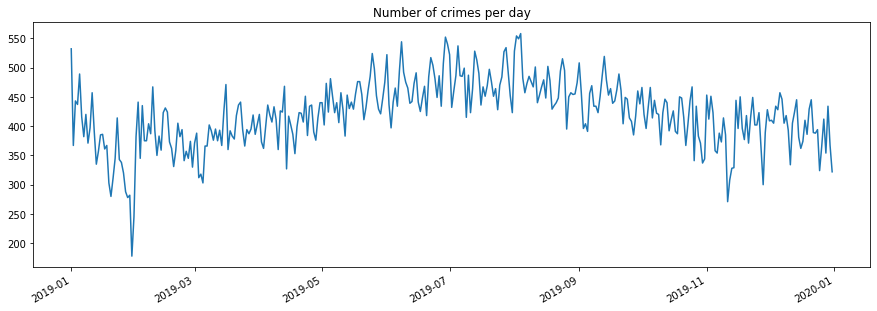

In [6]:
# Plot number of crimes per day
crime_df['Date'] = pd.to_datetime(crime_df['Date'], format='%m/%d/%Y %I:%M:%S %p')  # Convert to datetime
crime_df['Date'] = crime_df['Date'].dt.date                                         # Remove time
crime_df['Date'] = pd.to_datetime(crime_df['Date'])                                # Convert back to datetime
crime_df['Date'].value_counts().plot(figsize=(15,5), title='Number of crimes per day')  # Plot
# plt.savefig('dataset_analysis/crimes_per_day.jpg', bbox_inches='tight')

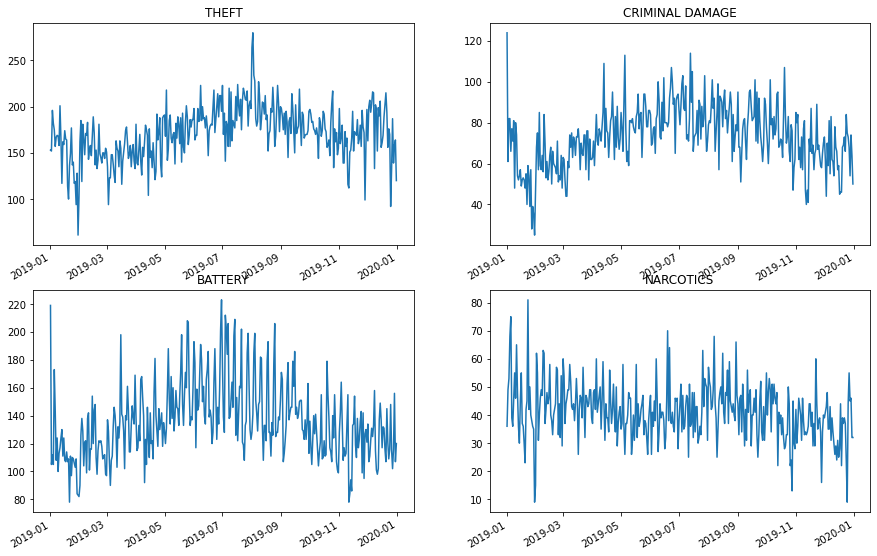

In [7]:
# plot number of crimes of each 4 categories per day in a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15,10))
for i, ax in enumerate(axes.flatten()):
    crime_df[crime_df['Primary Type'] == selected_cats[i]]['Date'].value_counts().plot(ax=ax, title=selected_cats[i])
plt.savefig('our_dataset/crimes_per_day_4_cats.jpg', bbox_inches='tight')

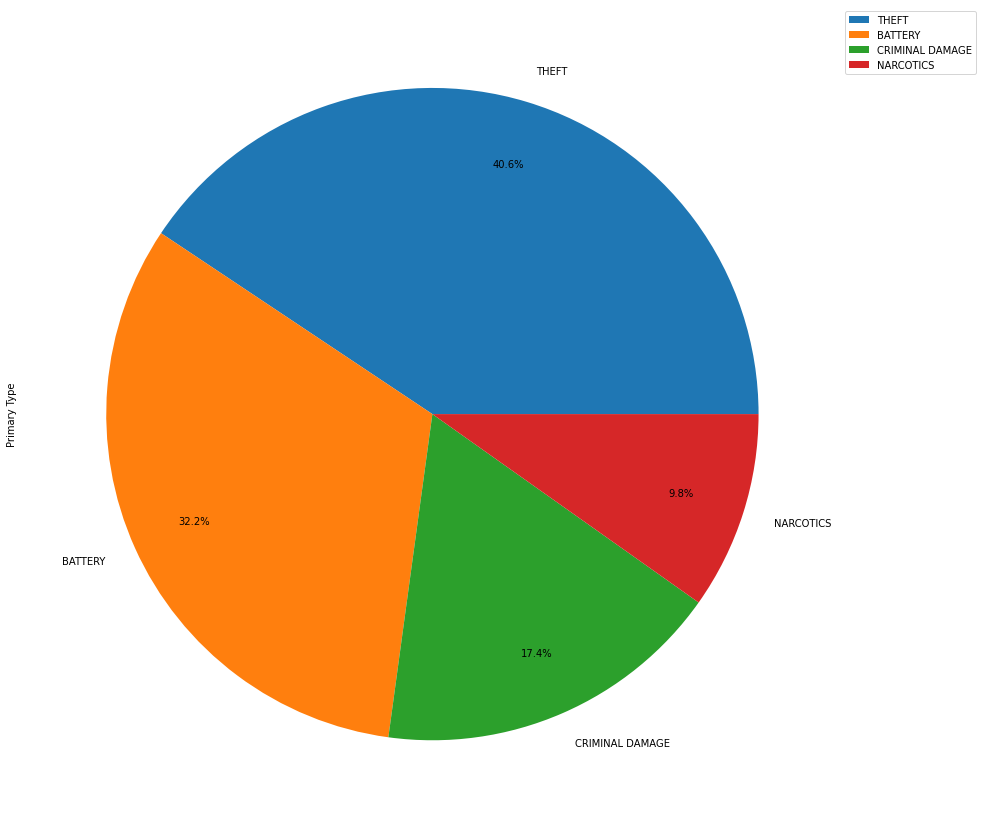

In [8]:
crime_types = crime_df["Primary Type"].value_counts()
crime_types.plot(kind='pie', figsize=(15,15), autopct='%1.1f%%', pctdistance=0.8, labeldistance=1.1)
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# Spatial Analysis

In [9]:
print(crime_df.shape)
print(crime_df["Latitude"].min(), crime_df["Latitude"].max())
print(crime_df["Longitude"].min(), crime_df["Longitude"].max())

coord_range = [[41.60,42.05], [-87.9,-87.5]]  # Lat-Lon
lat_idx = (coord_range[0][0] <= crime_df["Latitude"]) & (crime_df["Latitude"] <= coord_range[0][1])
lon_idx = (coord_range[1][0] <= crime_df["Longitude"]) & (crime_df["Longitude"] <= coord_range[1][1])

crime_df = crime_df[lat_idx & lon_idx]

print(crime_df["Latitude"].min(), crime_df["Latitude"].max())
print(crime_df["Longitude"].min(), crime_df["Longitude"].max())

(153747, 6)
36.619446395 42.022566994
-91.686565684 -87.524529378
41.644604096 42.022566994
-87.899493147 -87.524529378


In [10]:
def plot_background(ax, coord_range, M=10, N=11):
    background_path = "background/chicago.png"
    x_ticks = np.linspace(coord_range[1][0], coord_range[1][1], N + 1)
    y_ticks = np.linspace(coord_range[0][0], coord_range[0][1], M + 1)

    x_tick_labels = ["{:2.3f}".format(long) for long in x_ticks]
    y_tick_labels = ["{:2.3f}".format(lat) for lat in y_ticks]

    ax.set_xticks(ticks=x_ticks)
    ax.set_xticklabels(labels=x_tick_labels,
                  rotation=30,
                  size=12)
    ax.set_yticks(ticks=y_ticks)
    ax.set_yticklabels(labels=y_tick_labels,
                    size=12)

    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


    img = mpimg.imread(background_path)
    ax.imshow(img,
              interpolation='bilinear',
              extent=[*coord_range[1], *coord_range[0]])
    ax.grid(True)
    return ax

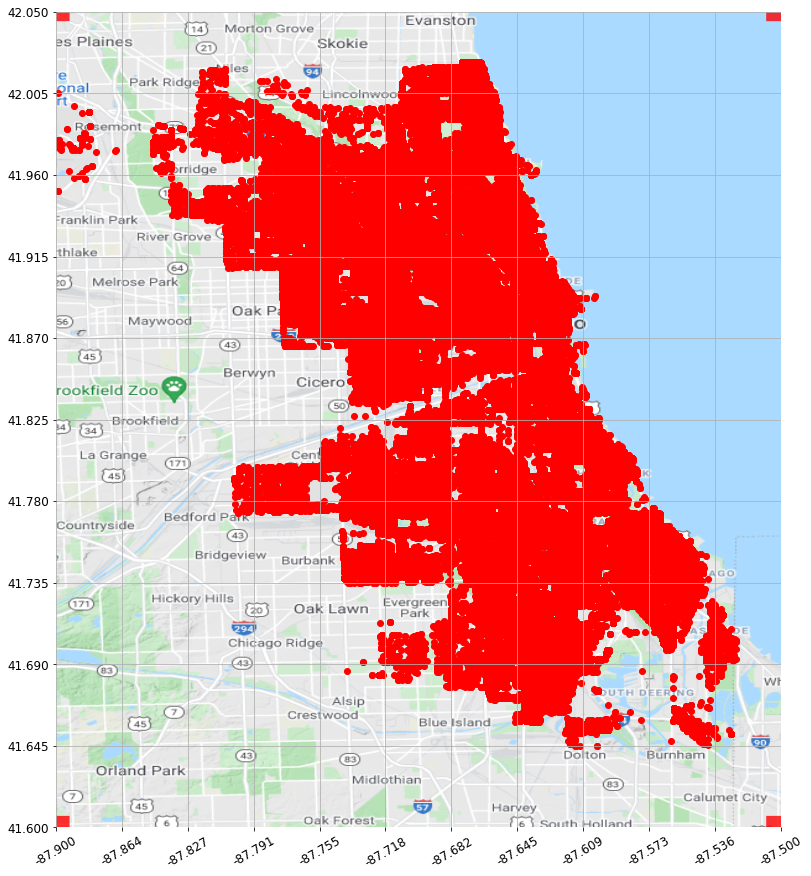

In [11]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_background(ax=ax, coord_range=coord_range)
ax.scatter(crime_df["Longitude"], crime_df["Latitude"], alpha=1, color="red")
# plt.savefig('dataset_analysis/crimes_per_location.jpg', bbox_inches='tight')
plt.show()

In [12]:
# BASED ON DENSITY
#         Group 1:  dict_keys([55, 76, 12, 51, 74, 9, 10, 72, 13, 52, 17, 64])
#         Group 2:  dict_keys([54, 57, 11, 56, 70, 50, 18, 75, 65, 59, 47, 5, 60, 4, 15, 62])
#         Group 3:  dict_keys([16, 31, 48, 58, 61, 30, 63, 2, 34, 45, 33, 41, 21, 53, 36, 20, 19, 73, 14])
#         Group 4:  dict_keys([37, 46, 39, 49, 22, 7, 77, 3, 40])
#         Group 5:  dict_keys([66, 24, 28, 35, 42, 69, 6, 38, 68, 71, 25, 67, 1, 23, 44, 27, 29, 43, 8, 26, 32])

group5 = {"very_low" : [55, 76, 12, 51, 74, 9, 10, 72, 13, 52, 17, 64],
            "low" : [54, 57, 11, 56, 70, 50, 18, 75, 65, 59, 47, 5, 60, 4, 15, 62],
            "medium" : [16, 31, 48, 58, 61, 30, 63, 2, 34, 45, 33, 41, 21, 53, 36, 20, 19, 73, 14],
            "high" : [37, 46, 39, 49, 22, 7, 77, 3, 40],
            "very_high" : [66, 24, 28, 35, 42, 69, 6, 38, 68, 71, 25, 67, 1, 23, 44, 27, 29, 43, 8, 26, 32]
            }

# BASED ON DENSITY
        # Group 1:  dict_keys([55, 76, 12, 51, 74, 9, 10, 72, 13, 52, 17, 64, 54, 57, 11, 56, 70, 50, 18, 75, 65, 59, 47, 5, 60, 4, 15, 62])
        # Group 2:  dict_keys([16, 31, 48, 58, 61, 30, 63, 2, 34, 45, 33, 41, 21, 53, 36, 20, 19, 73, 14, 37, 46, 39, 49, 22, 7, 77, 3, 40])
        # Group 3:  dict_keys([66, 24, 28, 35, 42, 69, 6, 38, 68, 71, 25, 67, 1, 23, 44, 27, 29, 43, 8, 26, 32])

group3 = {"low" : [55, 76, 12, 51, 74, 9, 10, 72, 13, 52, 17, 64, 54, 57, 11, 56, 70, 50, 18, 75, 65, 59, 47, 5, 60, 4, 15, 62],
            "medium" : [16, 31, 48, 58, 61, 30, 63, 2, 34, 45, 33, 41, 21, 53, 36, 20, 19, 73, 14, 37, 46, 39, 49, 22, 7, 77, 3, 40],
            "high" : [66, 24, 28, 35, 42, 69, 6, 38, 68, 71, 25, 67, 1, 23, 44, 27, 29, 43, 8, 26, 32]
            }

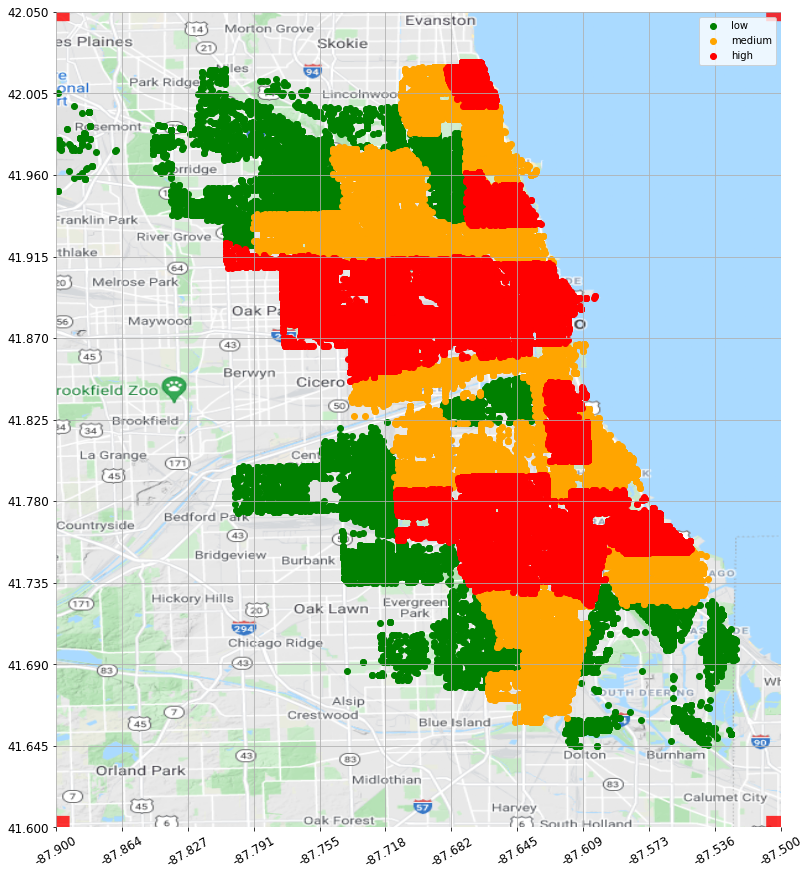

In [13]:
crime_df_low = crime_df[crime_df["Community Area"].isin(group3["low"])]
crime_df_medium = crime_df[crime_df["Community Area"].isin(group3["medium"])]
crime_df_high = crime_df[crime_df["Community Area"].isin(group3["high"])]

# mark the groups with different color in the map
fig, ax = plt.subplots(figsize=(20, 15))
plot_background(ax=ax, coord_range=coord_range)
ax.scatter(crime_df_low["Longitude"], crime_df_low["Latitude"], alpha=1, color="green")
ax.scatter(crime_df_medium["Longitude"], crime_df_medium["Latitude"], alpha=1, color="orange")
ax.scatter(crime_df_high["Longitude"], crime_df_high["Latitude"], alpha=1, color="red")
# plt.savefig('dataset_analysis/density_group3.jpg', bbox_inches='tight')
plt.legend(["low", "medium", "high"])
plt.show()

del crime_df_low, crime_df_medium, crime_df_high

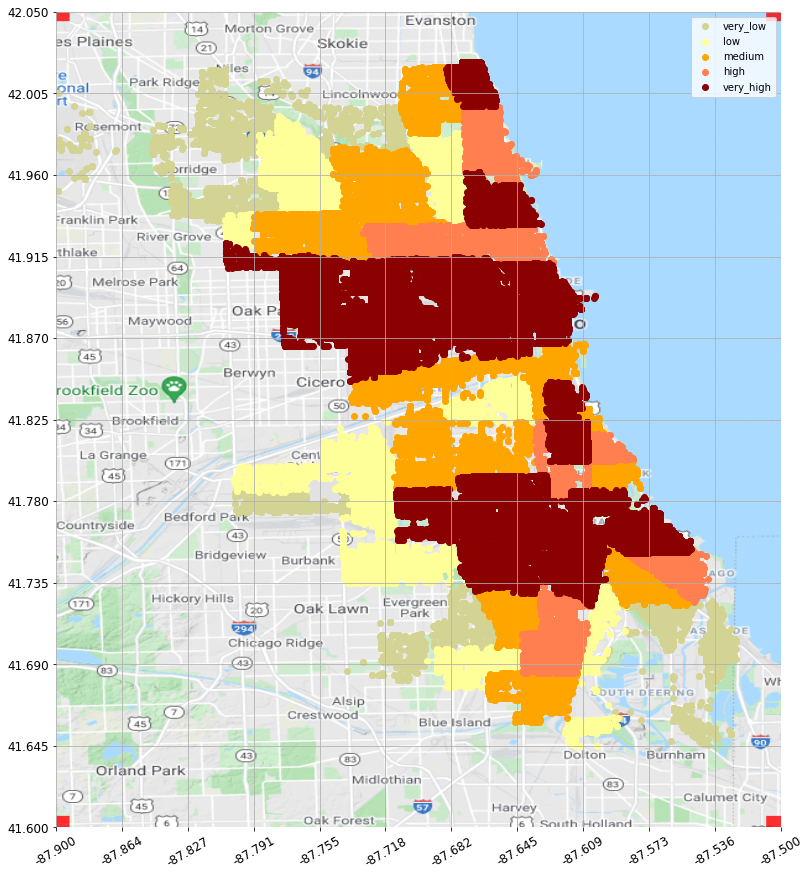

In [14]:
crime_df_ver_low = crime_df[crime_df["Community Area"].isin(group5["very_low"])]
crime_df_low = crime_df[crime_df["Community Area"].isin(group5["low"])]
crime_df_medium = crime_df[crime_df["Community Area"].isin(group5["medium"])]
crime_df_high = crime_df[crime_df["Community Area"].isin(group5["high"])]
crime_df_very_high = crime_df[crime_df["Community Area"].isin(group5["very_high"])]

# mark the groups with different color in the map
fig, ax = plt.subplots(figsize=(20, 15))
plot_background(ax=ax, coord_range=coord_range)

ax.scatter(crime_df_ver_low["Longitude"], crime_df_ver_low["Latitude"], alpha=1, color="#d3d393")
ax.scatter(crime_df_low["Longitude"], crime_df_low["Latitude"], alpha=1, color="#ffff99")
ax.scatter(crime_df_medium["Longitude"], crime_df_medium["Latitude"], alpha=1, color="#ffa500")
ax.scatter(crime_df_high["Longitude"], crime_df_high["Latitude"], alpha=1, color="#ff7f50")
ax.scatter(crime_df_very_high["Longitude"], crime_df_very_high["Latitude"], alpha=1, color="#8b0000")

# plt.savefig('dataset_analysis/density_group5.jpg', bbox_inches='tight')
plt.legend(["very_low", "low", "medium", "high", "very_high"])
plt.show()

del crime_df_ver_low, crime_df_low, crime_df_medium, crime_df_high, crime_df_very_high

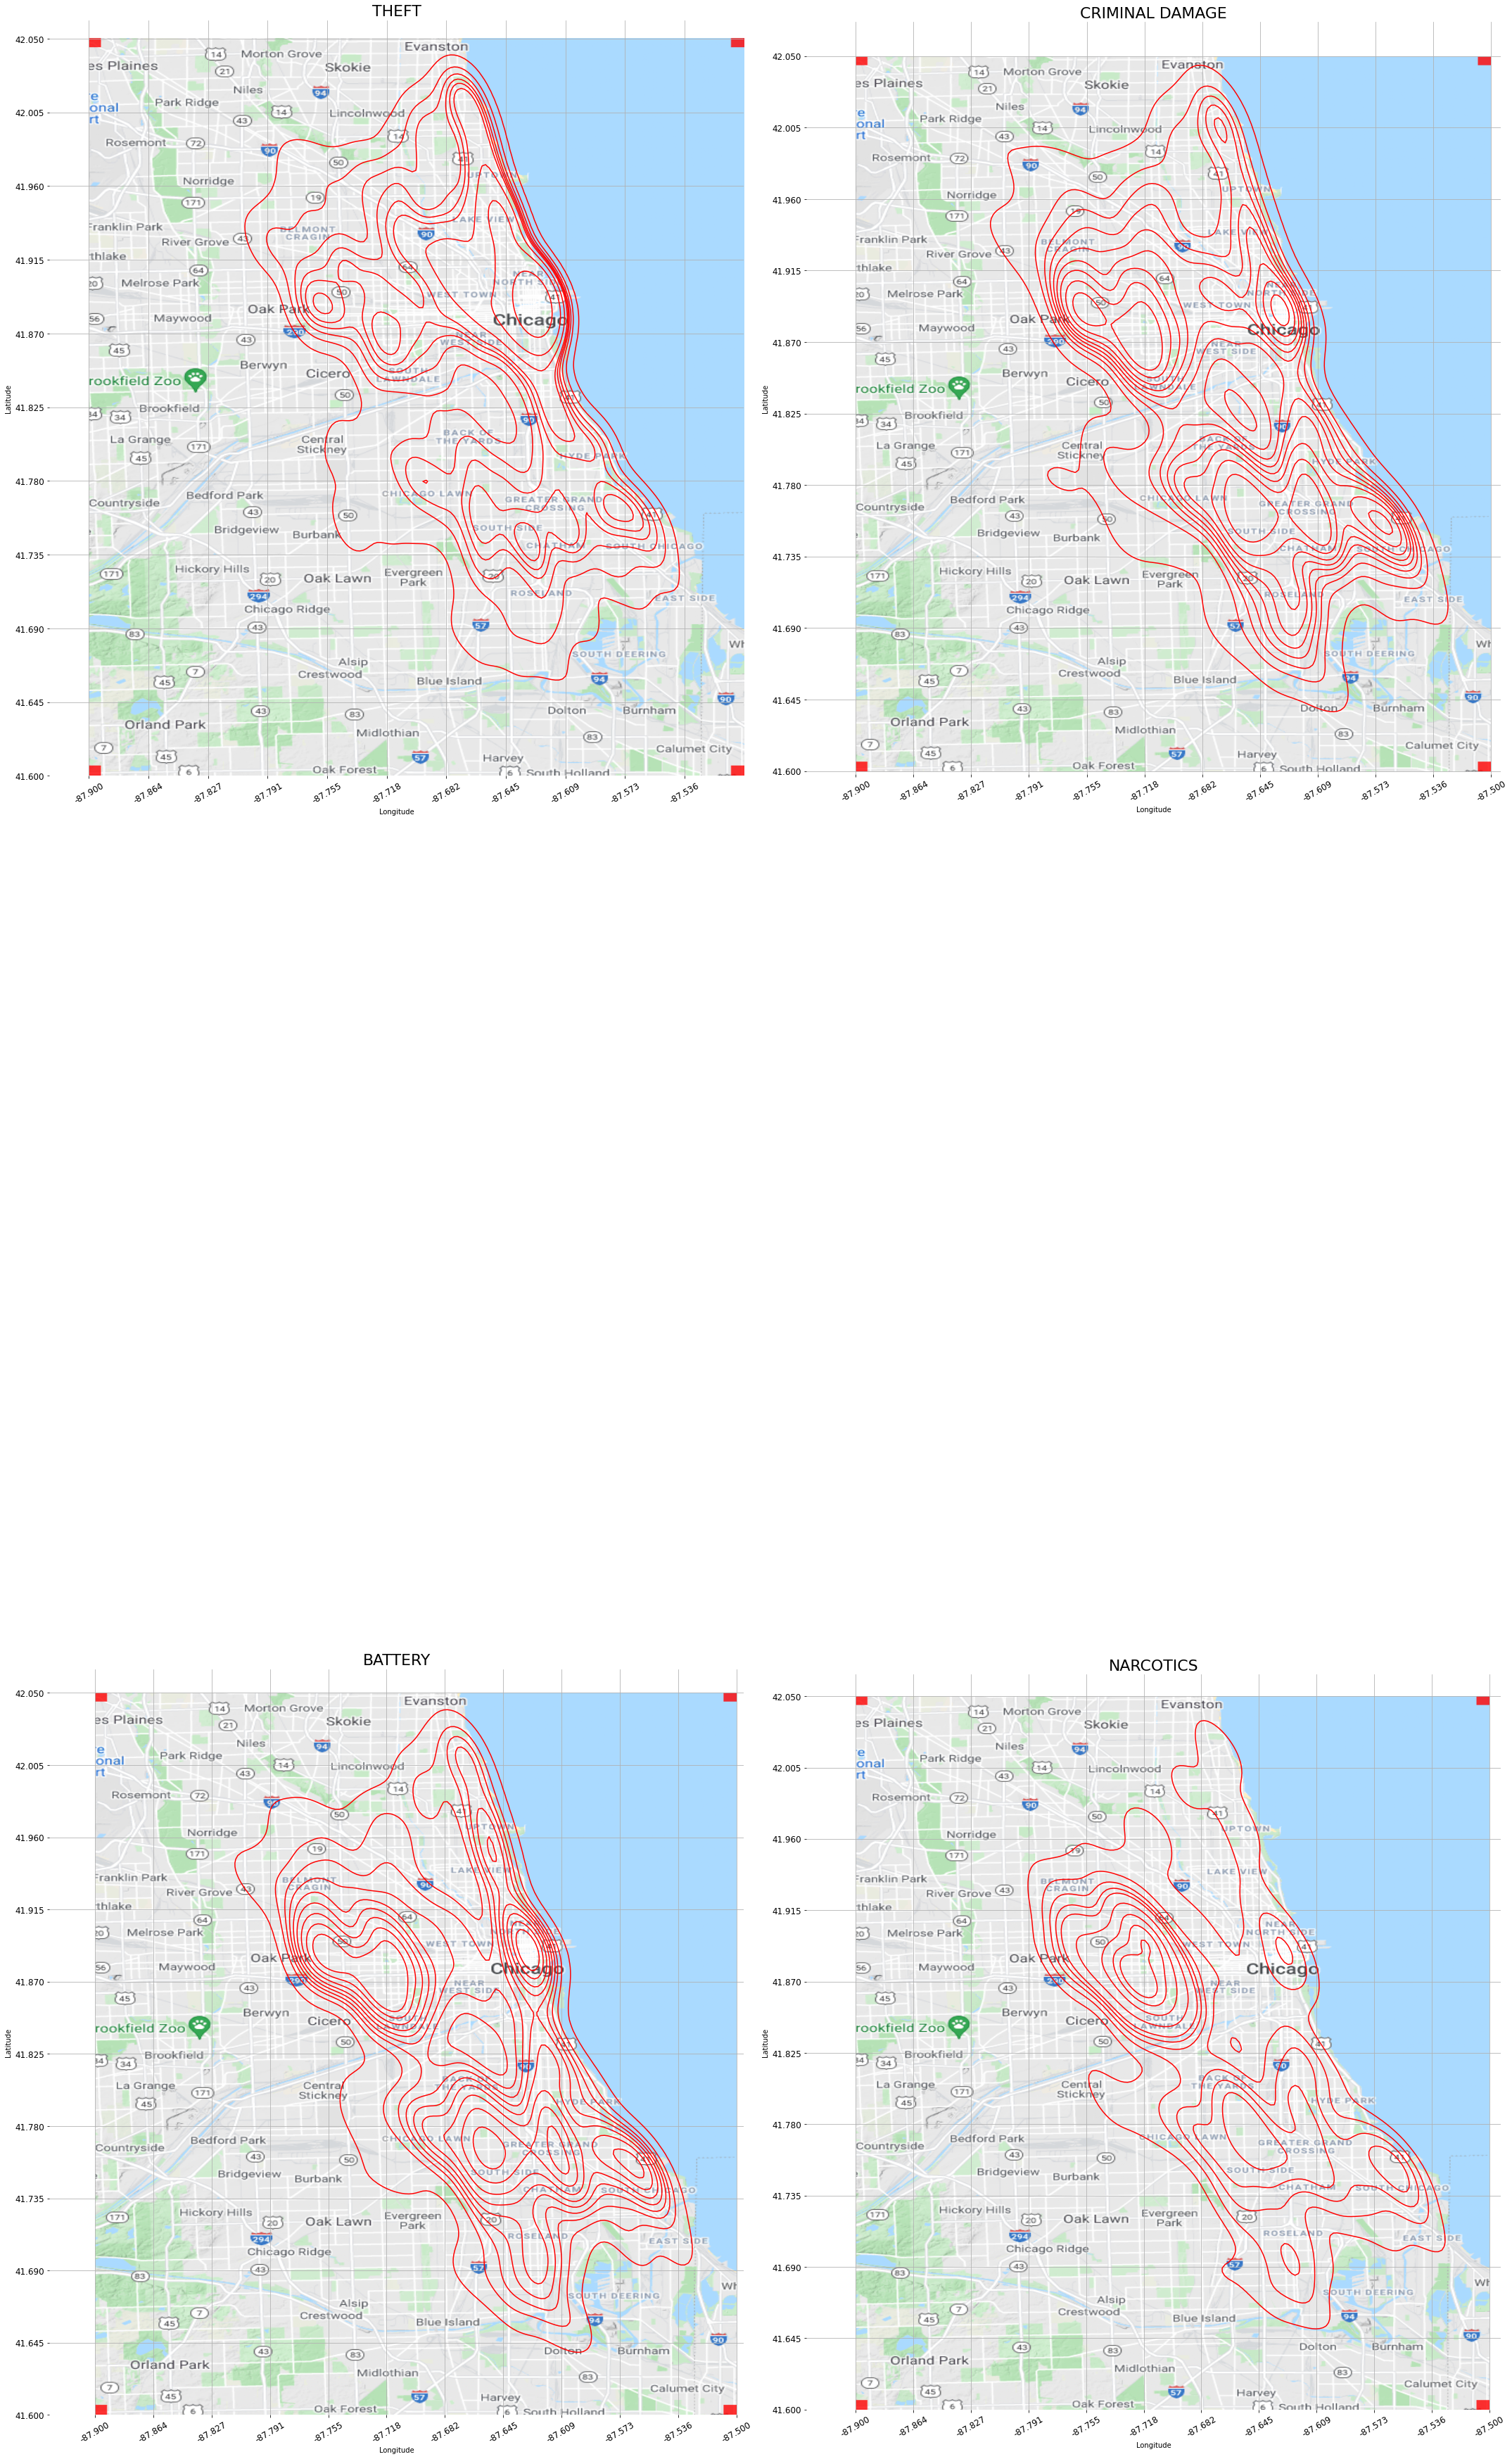

In [18]:
crime_types = list(crime_df["Primary Type"].unique())

fig, ax = plt.subplots(2, 2, figsize=(30, 80))

for i in range(len(crime_types)):
    crime_type = crime_types[i]
    row_idx, col_idx = i // 2, i % 2

    plot_background(ax=ax[row_idx, col_idx], coord_range=coord_range)
    sns.kdeplot(x=crime_df[crime_df["Primary Type"] == crime_type].Longitude,
                y=crime_df[crime_df["Primary Type"] == crime_type].Latitude, ax=ax[row_idx, col_idx], color='r')
    ax[row_idx, col_idx].set_title(crime_type, fontsize=22)

fig.tight_layout()
plt.savefig('our_dataset/crimes_per_location_per_type_kde.jpg', bbox_inches='tight')

# Data 2020

In [2]:
data_2020 = pd.read_csv("../data_2020.csv")
data_2020.head()

Unnamed: 0                    Date Primary Type   Latitude  Longitude  \
0         126  12/31/2020 11:59:00 PM        THEFT  41.911684 -87.745918   
1         127  12/31/2020 11:51:00 PM      BATTERY  41.863407 -87.710456   
2         128  12/31/2020 11:45:00 PM      BATTERY  41.748531 -87.600256   
3         129  12/31/2020 11:45:00 PM        THEFT  41.888165 -87.622937   
4         130  12/31/2020 11:45:00 PM        THEFT  41.805125 -87.612569   

   Community Area  
0            25.0  
1            29.0  
2            44.0  
3            32.0  
4            38.0

In [3]:
data_2020["Primary Type"].unique()

array(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION',
       'MOTOR VEHICLE THEFT', 'BURGLARY', 'ROBBERY', 'OTHER OFFENSE',
       'NARCOTICS', 'CRIMINAL TRESPASS', 'PUBLIC PEACE VIOLATION',
       'ASSAULT', 'LIQUOR LAW VIOLATION', 'DECEPTIVE PRACTICE',
       'STALKING', 'SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'HOMICIDE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'PROSTITUTION', 'KIDNAPPING',
       'OBSCENITY', 'PUBLIC INDECENCY', 'GAMBLING', 'RITUALISM',
       'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL',
       'CRIM SEXUAL ASSAULT'], dtype=object)

In [4]:
selected_cats = ["THEFT", "BATTERY", "CRIMINAL DAMAGE", "NARCOTICS"]
data_2020 = data_2020[data_2020["Primary Type"].isin(selected_cats)]
data_2020.head()

Unnamed: 0                    Date Primary Type   Latitude  Longitude  \
0         126  12/31/2020 11:59:00 PM        THEFT  41.911684 -87.745918   
1         127  12/31/2020 11:51:00 PM      BATTERY  41.863407 -87.710456   
2         128  12/31/2020 11:45:00 PM      BATTERY  41.748531 -87.600256   
3         129  12/31/2020 11:45:00 PM        THEFT  41.888165 -87.622937   
4         130  12/31/2020 11:45:00 PM        THEFT  41.805125 -87.612569   

   Community Area  
0            25.0  
1            29.0  
2            44.0  
3            32.0  
4            38.0

<AxesSubplot:title={'center':'Number of crimes per day'}>

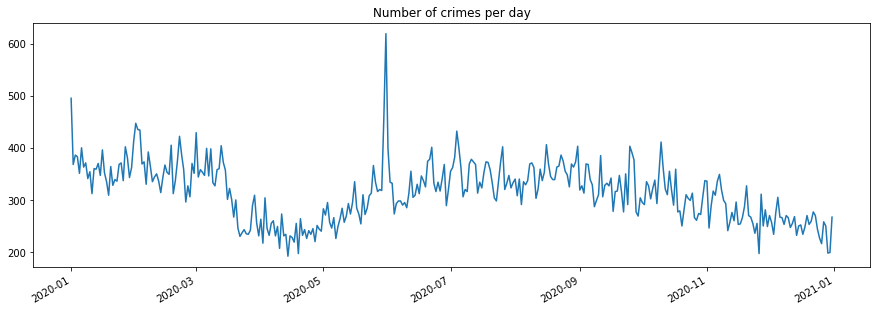

In [5]:
# Plot number of crimes per day
data_2020['Date'] = pd.to_datetime(data_2020['Date'], format='%m/%d/%Y %I:%M:%S %p')  # Convert to datetime
data_2020['Date'] = data_2020['Date'].dt.date                                         # Remove time
data_2020['Date'] = pd.to_datetime(data_2020['Date'])                                # Convert back to datetime
data_2020['Date'].value_counts().plot(figsize=(15,5), title='Number of crimes per day')  # Plot
# plt.savefig('dataset_analysis/crimes_per_day.jpg', bbox_inches='tight')

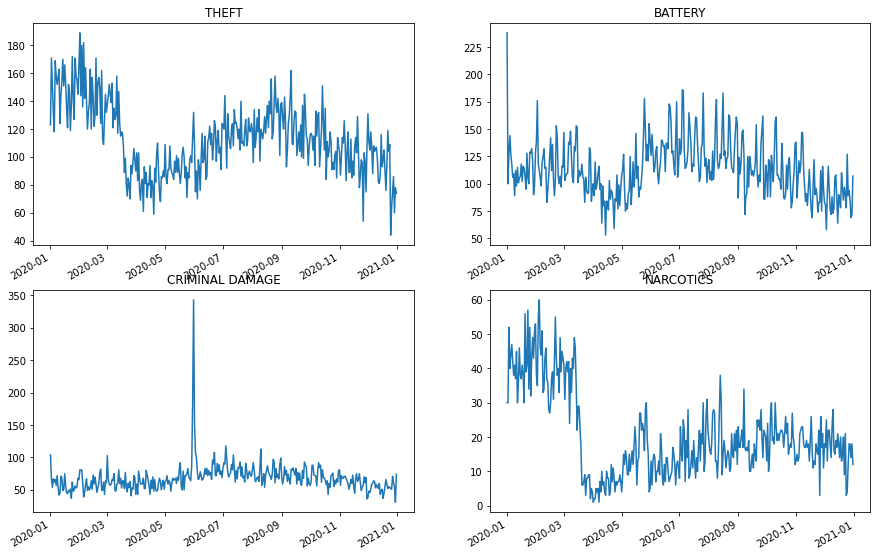

In [7]:
# plot number of crimes of each 4 categories per day in a 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(15,10))
for i, ax in enumerate(axes.flatten()):
    data_2020[data_2020['Primary Type'] == selected_cats[i]]['Date'].value_counts().plot(ax=ax, title=selected_cats[i])
plt.savefig('our_dataset/crimes_per_day_4_cats.jpg', bbox_inches='tight')